In [1]:
# get colours
# UV: fuv - nuv @ z=0.1
# Optical: g -r @ z=0.1
# See Lovell et al 2024 for compairson data. 
import h5py
from unyt import angstrom, erg, Hz, s, cm  # Import unyt units, including cm
from synthesizer.conversions import lnu_to_absolute_mag
import numpy as np
from synthesizer.filters import Filter, FilterCollection
import matplotlib.pyplot as plt

BoxSize = 25.0
little_h =  0.6711
Vcom = BoxSize/little_h
print(Vcom)


37.2522723886157


In [49]:
# first things first, lets just read in the hdf5 files to see what they look like.
file_path = "/disk/xray15/aem2/data/28pams/IllTNG/IllustrisTNG_1P_p28_n1_photometry.hdf5"
with h5py.File(file_path, 'r') as f:
    
    # Function to recursively print the structure of the HDF5 file
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, Shape: {obj.shape}, Data Type: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")
            
    # Use the visititems method to iterate over all groups and datasets in the file
    f.visititems(print_structure)

Group: snap_044
Group: snap_044/BC03
Group: snap_044/BC03/photometry
Group: snap_044/BC03/photometry/flux
Group: snap_044/BC03/photometry/flux/attenuated
Dataset: snap_044/BC03/photometry/flux/attenuated/GALEX FUV, Shape: (931,), Data Type: float64
Dataset: snap_044/BC03/photometry/flux/attenuated/GALEX NUV, Shape: (931,), Data Type: float64
Group: snap_044/BC03/photometry/flux/attenuated/Generic
Dataset: snap_044/BC03/photometry/flux/attenuated/Generic/Johnson.B, Shape: (931,), Data Type: float64
Dataset: snap_044/BC03/photometry/flux/attenuated/Generic/Johnson.J, Shape: (931,), Data Type: float64
Dataset: snap_044/BC03/photometry/flux/attenuated/Generic/Johnson.U, Shape: (931,), Data Type: float64
Dataset: snap_044/BC03/photometry/flux/attenuated/Generic/Johnson.V, Shape: (931,), Data Type: float64
Group: snap_044/BC03/photometry/flux/attenuated/HST
Dataset: snap_044/BC03/photometry/flux/attenuated/HST/ACS_HRC.F435W, Shape: (931,), Data Type: float64
Dataset: snap_044/BC03/photometry

/disk/xray15/aem2/envs/camels/lib/python3.8/site-packages/synthesizer/filters.py:1201: RuntimeWarning: Out of range transmission values found (min=0.0, max=61.66). Transmission will be clipped to [0-1]
  self.clip_transmission()
/disk/xray15/aem2/envs/camels/lib/python3.8/site-packages/synthesizer/filters.py:1201: RuntimeWarning: Out of range transmission values found (min=0.0, max=36.806). Transmission will be clipped to [0-1]
  self.clip_transmission()
/disk/xray15/aem2/envs/camels/lib/python3.8/site-packages/synthesizer/filters.py:1507: RuntimeWarning: Out of range transmission values found (min=0.0, max=61.66). Transmission will be clipped to [0-1]
  self.clip_transmission()
/disk/xray15/aem2/envs/camels/lib/python3.8/site-packages/synthesizer/filters.py:1507: RuntimeWarning: Out of range transmission values found (min=0.0, max=36.806). Transmission will be clipped to [0-1]
  self.clip_transmission()


Calculated wavelength array: 
min = 1.33e+03 Angstrom
max = 3.02e+03 Angstrom
FilterCollection.lam.size = 1689


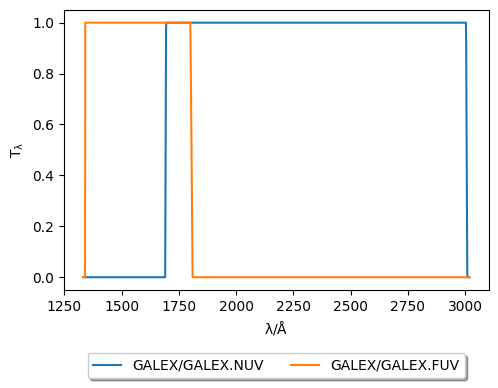

In [50]:
# define filters:
# GALEX: FUV and NUV
# GALEX/GALEX.FUV - λeff=1548.85	
# GALEX/GALEX.NUV - λeff=2303.37
filter_codes = [f"GALEX/GALEX.{f}" for f in ["NUV", "FUV"]]

new_filters = FilterCollection(filter_codes=filter_codes)
fig, ax = new_filters.plot_transmission_curves(show=True)


In [51]:
filter_codes[1]

'GALEX/GALEX.FUV'

In [52]:
# should look like this:

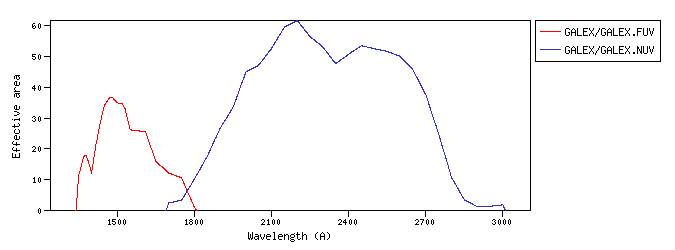

In [ ]:
# observed flux for one file to test.
file_path = "/disk/xray15/aem2/data/28pams/IllTNG/IllustrisTNG_1P_p1_n1_photometry.hdf5"

with h5py.File(file_path, 'r') as hdf:
    # flux data for GALEX and SLOAN bands
    galex_FUV_flux = hdf['snap_044/BC03/photometry/flux/attenuated/GALEX FUV'][:]
    galex_NUV_flux = hdf['snap_044/BC03/photometry/flux/attenuated/GALEX NUV'][:]
    sloan_r_flux = hdf['snap_044/BC03/photometry/flux/attenuated/SLOAN/SDSS.r'][:]
    sloan_g_flux = hdf['snap_044/BC03/photometry/flux/attenuated/SLOAN/SDSS.g'][:]
 # ergs / cm2 / Hz/ s
    # fluxes to magnitudes (assuming zero-point ZP = 0)
    galex_FUV_mag = -2.5 * np.log10(galex_FUV_flux)
    galex_NUV_mag = -2.5 * np.log10(galex_NUV_flux)
    sloan_r_mag = -2.5 * np.log10(sloan_r_flux)
    sloan_g_mag = -2.5 * np.log10(sloan_g_flux)

    # colors
    galex_color = galex_FUV_mag - galex_NUV_mag  # FUV - NUV color
    sloan_color = sloan_g_mag - sloan_r_mag      # g - r color



In [96]:
sloan_color

array([ 1.79515407e-01, -1.47147646e-01,  1.74481717e-01, -2.49622548e-01,
       -1.21616200e-01, -1.08265268e-01,  5.53265926e-02,  3.67459973e-01,
        6.89621371e-01,  4.84332778e-01,  9.13640108e-01, -1.76066145e-01,
       -5.90537471e-02, -2.01858488e-01,  9.55904986e-02, -5.28686509e-02,
        2.91398294e-02, -1.72537955e-01,  2.85544160e-01,  1.88132074e-01,
       -1.79723476e-01,  7.16663322e-02, -1.30554503e-01,  1.79720951e-01,
       -3.84735408e-02,  3.44260088e-01, -1.89452250e-01,  5.46764361e-02,
        4.41847117e-01, -3.28265544e-02, -6.43977777e-02, -1.37554610e-02,
        2.83356709e-01, -9.24710956e-02, -4.93530112e-02,  2.76862711e-01,
       -1.54337526e-01, -5.25829469e-02, -6.78037762e-02, -2.45920721e-01,
       -7.62939663e-02,  1.56050473e-02,  1.73196722e-01,  2.12210289e-02,
        9.18409557e-01,  8.70548303e-01,  3.04403005e-01, -1.43920855e-01,
        6.77826946e-02, -1.27894471e-01, -1.22047059e-01, -5.85321851e-02,
       -5.88646487e-02,  

In [95]:
galex_color

array([ 9.33271067e-01,  1.71232408e-03, -5.30613740e-01, -9.73711825e-01,
        3.68330730e+00,  2.66455343e+00,  1.03698489e+00, -2.93604799e-01,
       -3.48477404e-01, -3.65031420e-01, -2.70314217e-01, -7.83775271e-01,
        5.70132342e-01, -2.25414689e-01,  1.33947799e+00,  3.35516768e+00,
        2.07255454e+00, -6.32903276e-01, -6.65831092e-04,  2.60876190e-01,
        4.62859131e+00,  1.29713545e+00,  5.25372321e+00,  1.62824551e-01,
        3.05502627e+00, -5.67582256e-01,  9.99391526e-01,  1.26268495e+00,
       -3.26427724e-01,  5.10721517e-01, -3.96964278e-01,  2.54323996e+00,
        1.94671808e-01, -5.57923836e-01,  1.97118291e-01,  2.66518426e-03,
        4.58070856e+00,  4.24902703e+00, -2.82672601e-01, -5.37616724e-01,
        4.22226704e+00,  2.10323093e+00,  5.33586283e-01,  1.66357667e+00,
       -3.50247821e-01, -3.50817538e-01, -2.81792173e-02, -5.50031224e-02,
        1.42335976e+00, -3.30129466e-01,  3.67302486e+00,  3.18823134e+00,
       -1.39939004e-01,  

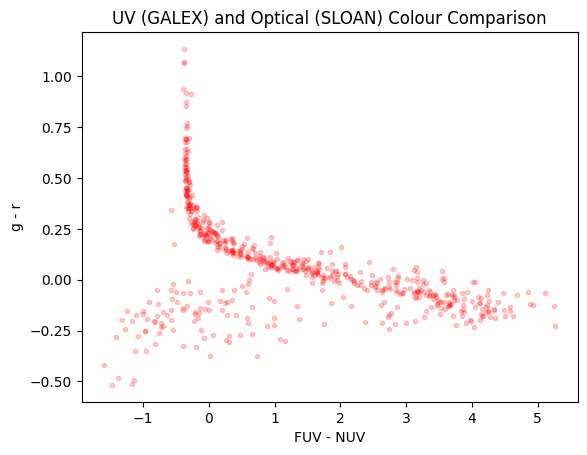

In [88]:
# Plotting the colors
plt.scatter(galex_color, sloan_color, s=9, alpha=0.2, color='red')
plt.xlabel('FUV - NUV')
plt.ylabel('g - r')
plt.title('UV (GALEX) and Optical (SLOAN) Colour Comparison')
plt.savefig('/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P/colours/test/GALEX_SLOAN_TEST.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()


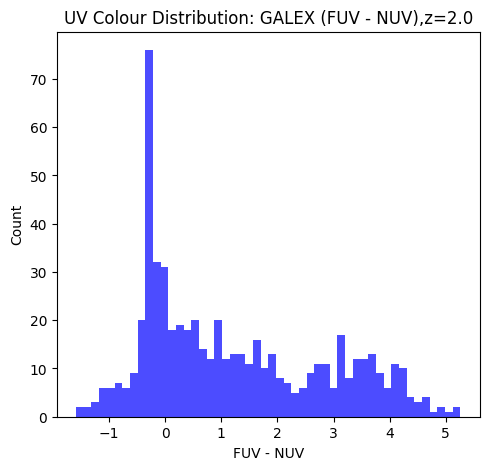

In [92]:
# colour distributions as histograms
# galex fuv-nuv
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(galex_color, bins=50, color='blue', alpha=0.7)
plt.xlabel('FUV - NUV')
plt.ylabel('Count')
plt.title('UV Colour Distribution: GALEX (FUV - NUV),z=2.0')

plt.savefig('/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P/colours/test/GALEX_DIST_TEST.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()


Text(0.5, 1.0, 'Optical Colour Distribution: SLOAN (g - r),z=2.0')

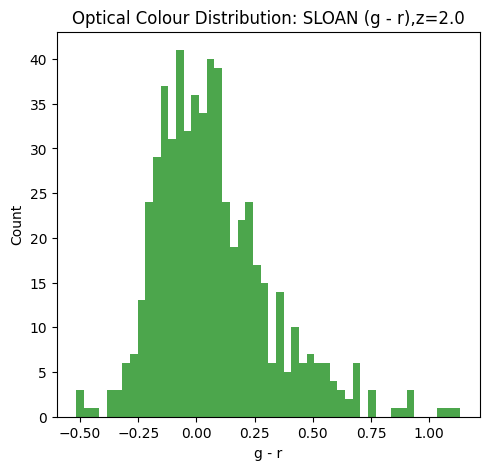

In [93]:
# sloan colour distribution (g - r)
# colour distributions as histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(sloan_color, bins=50, color='green', alpha=0.7)
plt.xlabel('g - r')
plt.ylabel('Count')
plt.title('Optical Colour Distribution: SLOAN (g - r),z=2.0')


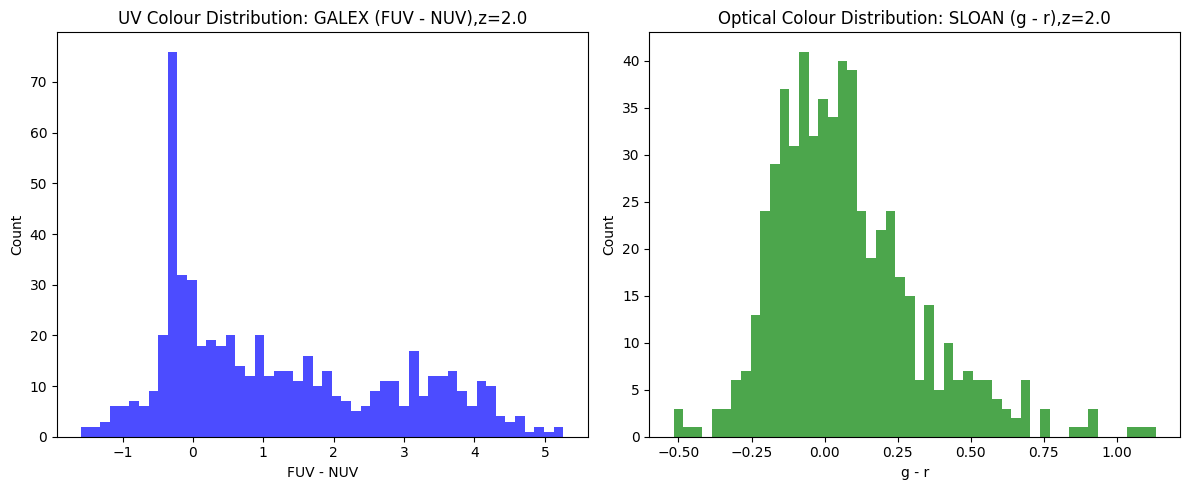

In [94]:
plt.figure(figsize=(12, 5))

# GALEX/ UV: (FUV - NUV)
plt.subplot(1, 2, 1)
plt.hist(galex_color, bins=50, color='blue', alpha=0.7)
plt.xlabel('FUV - NUV')
plt.ylabel('Count')
plt.title('UV Colour Distribution: GALEX (FUV - NUV),z=2.0')

# Sloan/ optical: (g - r)
plt.subplot(1, 2, 2)
plt.hist(sloan_color, bins=50, color='green', alpha=0.7)
plt.xlabel('g - r')
plt.ylabel('Count')
plt.title('Optical Colour Distribution: SLOAN (g - r),z=2.0')

# Save and show the plot
plt.tight_layout()
plt.savefig('/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P/colours/test/GALEX_SLOAN_Histograms.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
# lets make a function that can take in the redshift /file and then generate the colour distrubution like figure 6 of chris's paper:
def get_colour(abs_mag, volume, massBinLimits):
    hist, _ = np.histogram(abs_mag, bins=massBinLimits)
    hist = np.float64(hist)
    phi = (hist / volume) / (massBinLimits[1] - massBinLimits[0])
    phi_sigma = (np.sqrt(hist) / volume) / (massBinLimits[1] - massBinLimits[0])
    return phi, phi_sigma, hist

# Define file path
input_dir = "/disk/xray15/aem2/data/28pams/IllTNG"
output_dir = "/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P/colours/test"
# for file ending .hdf5 /IllustrisTNG_1P_p1_n1_photometry.hdf5:


with h5py.File(file_path, 'r') as hdf:
    # Access flux data for GALEX and SLOAN bands
    galex_FUV_flux = hdf['snap_044/BC03/photometry/flux/attenuated/GALEX FUV'][:]
    galex_NUV_flux = hdf['snap_044/BC03/photometry/flux/attenuated/GALEX NUV'][:]
    sloan_r_flux = hdf['snap_044/BC03/photometry/flux/attenuated/SLOAN/SDSS.r'][:]
    sloan_g_flux = hdf['snap_044/BC03/photometry/flux/attenuated/SLOAN/SDSS.g'][:]

    # Convert fluxes to magnitudes (assuming zero-point ZP = 0)
    galex_FUV_mag = -2.5 * np.log10(galex_FUV_flux)
    galex_NUV_mag = -2.5 * np.log10(galex_NUV_flux)
    sloan_r_mag = -2.5 * np.log10(sloan_r_flux)
    sloan_g_mag = -2.5 * np.log10(sloan_g_flux)

    # Calculate colors
    galex_color = galex_FUV_mag - galex_NUV_mag  # FUV - NUV color
    sloan_color = sloan_g_mag - sloan_r_mag      # g - r color

